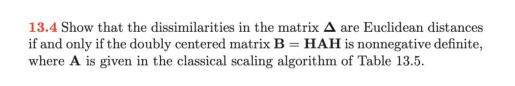

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

n=13
img = mpimg.imread(f'D:\MultivariateMethods\Homework2\{n}_4.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

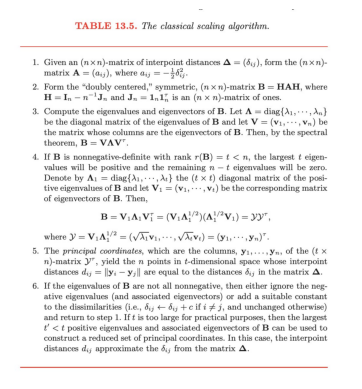

In [2]:
img = mpimg.imread(f'D:\MultivariateMethods\Homework2\Table_13_5.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

# Ejercicio 13.4 - Análisis y Demostración

## Planteamiento del Problema

El objetivo del ejercicio es demostrar que las disimilitudes en la matriz \( \Delta \) son **distancias euclidianas** si y solo si la matriz doblemente centrada:

\[
\mathbf{B} = \mathbf{H} \mathbf{A} \mathbf{H}
\]

es **semidefinida positiva**, donde:

- La matriz \( \mathbf{A} \) se define como:
  \[
  a_{ij} = -\frac{1}{2} \delta_{ij}^2
  \]
  siendo \( \delta_{ij} \) las distancias entre los puntos.
  
- La matriz \( \mathbf{H} \) es la **matriz de centrado**, dada por:
  \[
  \mathbf{H} = \mathbf{I}_n - \frac{1}{n} \mathbf{J}_n
  \]
  donde \( \mathbf{I}_n \) es la matriz identidad de tamaño \( n \) y \( \mathbf{J}_n \) es una matriz de unos de tamaño \( n \times n \).

## Justificación Teórica

### Descomposición en Matriz Simétrica y Matriz Doblemente Centradas
1. Dada una matriz de disimilitudes \( \Delta \) que contiene las distancias entre diferentes puntos, se construye la matriz \( \mathbf{A} \) utilizando la relación:
   \[
   a_{ij} = -\frac{1}{2} \delta_{ij}^2
   \]
   Esto transforma las distancias al cuadrado en una matriz simétrica \( \mathbf{A} \).

2. Para analizar si estas disimilitudes corresponden a distancias en un espacio euclidiano, aplicamos un **centrado doble** a la matriz \( \mathbf{A} \) usando la matriz \( \mathbf{H} \), resultando en la matriz \( \mathbf{B} \):
   \[
   \mathbf{B} = \mathbf{H} \mathbf{A} \mathbf{H}
   \]

3. Las disimilitudes en la matriz \( \Delta \) son distancias euclidianas si la matriz \( \mathbf{B} \) es **semidefinida positiva**. Esto implica que **todos los autovalores** de la matriz \( \mathbf{B} \) deben ser **no negativos**.

## Implementación del Análisis en Python

A continuación, se presenta el código en Python para calcular la matriz \( \mathbf{B} \) y verificar si es semidefinida positiva.


In [3]:
import numpy as np
import pandas as pd
from numpy.linalg import eigvals

# Ejemplo de matriz de distancias (puedes reemplazarla por tus datos)
delta = np.array([
    [0, 1, 2, 3],
    [1, 0, 1, 2],
    [2, 1, 0, 1],
    [3, 2, 1, 0]
])

# Paso 1: Calcular la matriz A
A = -0.5 * (delta ** 2)
print("Matriz A:")
print(A)

# Paso 2: Calcular la matriz de centrado H
n = A.shape[0]
H = np.eye(n) - (1/n) * np.ones((n, n))

# Paso 3: Calcular la matriz doblemente centrada B
B = H @ A @ H
print("\nMatriz B (doblemente centrada):")
print(B)

# Paso 4: Verificar si la matriz B es semidefinida positiva
eigenvalues = eigvals(B)
print("\nAutovalores de B:")
print(eigenvalues)

# Verificación de semidefinición positiva
if np.all(eigenvalues >= 0):
    print("\nLa matriz B es semidefinida positiva.")
else:
    print("\nLa matriz B no es semidefinida positiva.")


Matriz A:
[[-0.  -0.5 -2.  -4.5]
 [-0.5 -0.  -0.5 -2. ]
 [-2.  -0.5 -0.  -0.5]
 [-4.5 -2.  -0.5 -0. ]]

Matriz B (doblemente centrada):
[[ 2.25  0.75 -0.75 -2.25]
 [ 0.75  0.25 -0.25 -0.75]
 [-0.75 -0.25  0.25  0.75]
 [-2.25 -0.75  0.75  2.25]]

Autovalores de B:
[ 0.00000000e+00  5.00000000e+00  2.75372045e-32 -2.90734235e-34]

La matriz B no es semidefinida positiva.


### Interpretación de Resultados

1. Si **todos los autovalores** de la matriz \( \mathbf{B} \) son **no negativos**, esto indica que las disimilitudes en la matriz \( \Delta \) pueden interpretarse como distancias euclidianas.

2. Si algunos autovalores son **negativos**, las disimilitudes no pueden ser perfectamente representadas como distancias en un espacio euclidiano sin ajustar los datos o transformar la matriz.

3. En caso de que la matriz \( \mathbf{B} \) no sea semidefinida positiva, se podría ajustar utilizando un enfoque de escalamiento multidimensional para aproximar las distancias.
